In [141]:
from datetime import datetime
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

#url = r'https://ebbd95e4-0888-4d16-8b9a-ec90476163b3.deepnoteproject.com/getSensorData' 
#response = requests.get(url)
#data = response.json()

with open('../data/response_1719663169041.txt', 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data)

timestamps = []
x_data = []
y_data = []
z_data = []

timestamp_factor = 100000000.0
experiment_id = 1

orientation_data = [entry for entry in data if entry["sensorId"] == "Orientation Sensor" and entry['experimentId'] == experiment_id]
gyroscope_data = [entry for entry in data if entry["sensorId"] == "LSM6DSO Gyroscope" and entry['experimentId'] == experiment_id]
accelerometer_data = [entry for entry in data if entry["sensorId"] == "LSM6DSO Accelerometer" and entry['experimentId'] == experiment_id]
#step_counter_data = [entry for entry in data if entry["sensorId"] == "Step Counter Sensor" and entry['experimentId'] == experiment_id]
#step_detector_data = [entry for entry in data if entry["sensorId"] == "Step Detector Sensor" and entry['experimentId'] == experiment_id]




# Acceleration

In [142]:
timestamps = [datetime.fromtimestamp(point['timestamp'] / timestamp_factor) for point in accelerometer_data]
x_values = [point['data'][0] for point in accelerometer_data]
y_values = [point['data'][1] for point in accelerometer_data]
z_values = [point['data'][2] for point in accelerometer_data]


# Calculating magnitude of acceleration in g
magnitude_acceleration = np.sqrt(np.array(x_values)**2 + np.array(y_values)**2 + np.array(z_values)**2)

In [143]:
mean_value = magnitude_acceleration.mean()
std_dev = magnitude_acceleration.std()
max_value = magnitude_acceleration.max()
min_value = magnitude_acceleration.min()
average_magnitude = np.mean(magnitude_acceleration)

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Max: {max_value}")
print(f"Min: {min_value}")

df = pd.DataFrame(magnitude_acceleration)
print(df.describe())

Mean: 22.317925617357904
Standard Deviation: 17.09494001545801
Max: 87.17782336073326
Min: 2.6370684858069917
                0
count  144.000000
mean    22.317926
std     17.154608
min      2.637068
25%      9.678124
50%     17.564889
75%     29.083867
max     87.177823


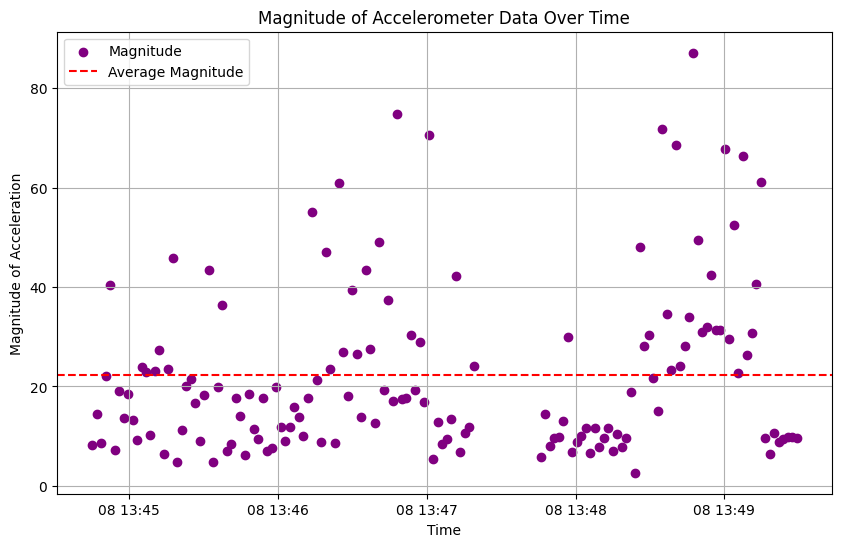

In [144]:
# Plotting magnitude
plt.figure(figsize=(10, 6))
plt.scatter(timestamps, magnitude_acceleration, label='Magnitude', color='purple')
plt.axhline(y=average_magnitude, color='red', linestyle='--', label='Average Magnitude')
plt.xlabel('Time')
plt.ylabel('Magnitude of Acceleration')
plt.title('Magnitude of Accelerometer Data Over Time')
plt.legend()
plt.grid(True)
plt.show()

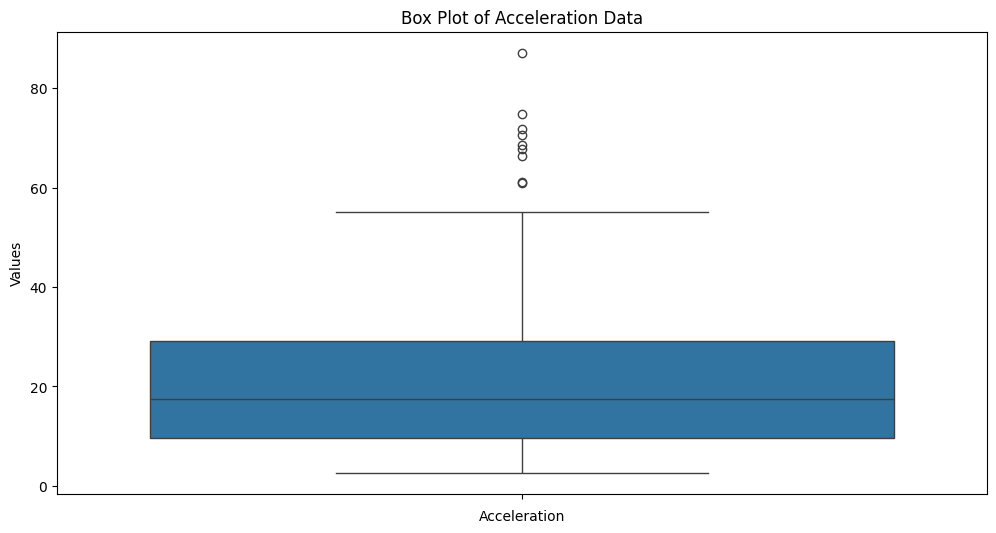

In [145]:
import seaborn as sns
# Identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=magnitude_acceleration)
plt.title('Box Plot of Acceleration Data')
plt.xlabel('Acceleration')
plt.ylabel('Values')
plt.show()

# Gyroscope

In [146]:
timestamps = [datetime.fromtimestamp(point['timestamp'] / timestamp_factor) for point in gyroscope_data]
x_values = [point['data'][0] for point in gyroscope_data]
y_values = [point['data'][1] for point in gyroscope_data]
z_values = [point['data'][2] for point in gyroscope_data]

# Calculating magnitude of acceleration in g
magnitude_gyroscope = np.sqrt(np.array(x_values)**2 + np.array(y_values)**2 + np.array(z_values)**2)
average_magnitude = np.mean(magnitude_gyroscope)

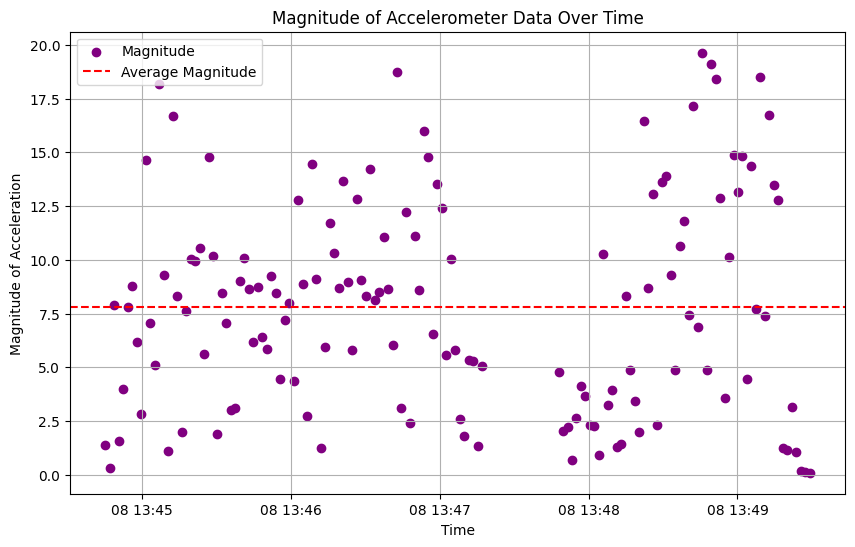

In [147]:
# Plotting magnitude
plt.figure(figsize=(10, 6))
plt.scatter(timestamps, magnitude_gyroscope, label='Magnitude', color='purple')
plt.axhline(y=average_magnitude, color='red', linestyle='--', label='Average Magnitude')
plt.xlabel('Time')
plt.ylabel('Magnitude of Acceleration')
plt.title('Magnitude of Accelerometer Data Over Time')
plt.legend()
plt.grid(True)
plt.show()

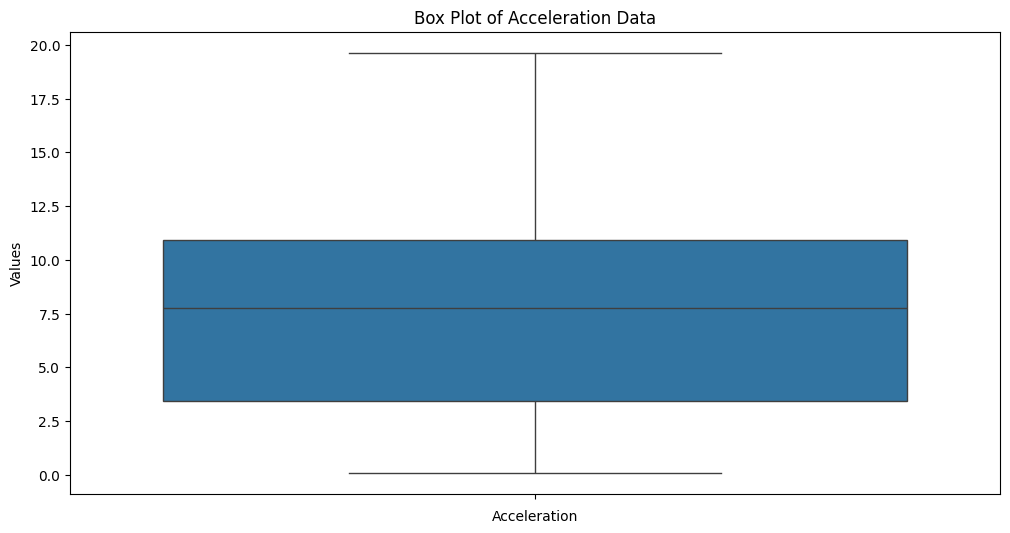

In [148]:
import seaborn as sns
# Identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=magnitude_gyroscope)
plt.title('Box Plot of Acceleration Data')
plt.xlabel('Acceleration')
plt.ylabel('Values')
plt.show()

In [149]:
mean_value = magnitude_gyroscope.mean()
std_dev = magnitude_gyroscope.std()
max_value = magnitude_gyroscope.max()
min_value = magnitude_gyroscope.min()

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Max: {max_value}")
print(f"Min: {min_value}")

df = pd.DataFrame(magnitude_gyroscope)
print(df.describe())

Mean: 7.812818394335285
Standard Deviation: 4.970594542503721
Max: 19.63246193152785
Min: 0.09278772940509637
                0
count  142.000000
mean     7.812818
std      4.988190
min      0.092788
25%      3.451961
50%      7.771656
75%     10.940926
max     19.632462


# Orientation

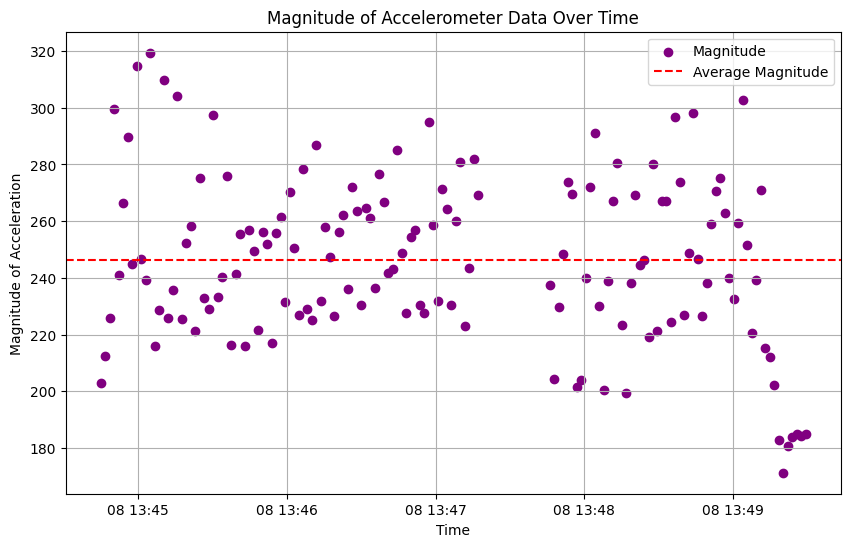

In [154]:



timestamps = [datetime.fromtimestamp(point['timestamp'] / timestamp_factor) for point in orientation_data]
x_values = [point['data'][0] for point in orientation_data]
y_values = [point['data'][1] for point in orientation_data]
z_values = [point['data'][2] for point in orientation_data]

magnitude_orentation = np.sqrt(np.array(x_values)**2 + np.array(y_values)**2 + np.array(z_values)**2)
average_orientation = np.mean(magnitude_orentation)

# Plotting magnitude
plt.figure(figsize=(10, 6))
plt.scatter(timestamps, magnitude_orentation, label='Magnitude', color='purple')
plt.axhline(y=average_orientation, color='red', linestyle='--', label='Average Magnitude')
plt.xlabel('Time')
plt.ylabel('Magnitude of Acceleration')
plt.title('Magnitude of Accelerometer Data Over Time')
plt.legend()
plt.grid(True)
plt.show()